<a href="https://colab.research.google.com/github/RJAbuNasser/Final-Project/blob/main/Latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
#First cell
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import wilcoxon, friedmanchisquare, shapiro
from statsmodels.stats.multitest import multipletests

**Inspecting Data**

In [2]:
#Second cell
zip_path = "Test and Actual.zip"
temp_dir = "temp_extracted"

if not os.path.exists(temp_dir):
    os.makedirs(temp_dir)

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(temp_dir)

for root, dirs, files in os.walk(temp_dir):
    for file in files:
        if "_full.xlsx" in file:
            file_path = os.path.join(root, file)
            print(f"Processing file: {file_path}")

            excel_data = pd.ExcelFile(file_path)
            for sheet_name in excel_data.sheet_names:
                if sheet_name.startswith("Sheet"):
                    print(f"Sheet: {sheet_name}")
                    df = excel_data.parse(sheet_name)

                    print(df.describe(include="all"))
                    print(df.info())

Streaming output truncated to the last 5000 lines.
std     36560.979028   33439.629571   38028.798126   40067.400544  
min         0.000000       0.000000       0.000000       0.000000  
25%        26.987626      27.327777      36.823589      16.867873  
50%       741.094968     579.579301     673.643912     552.319523  
75%      1474.455340    1802.046333    1910.584300    1966.715950  
max    146897.000000  134562.000000  152923.000000  161110.000000  

[8 rows x 30 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   3990.20876  16 non-null     float64
 1   2480.30772  16 non-null     float64
 2   3244.02646  16 non-null     float64
 3   2900.80124  16 non-null     float64
 4   2916.80232  16 non-null     float64
 5   2591.89884  16 non-null     float64
 6   2691.16627  16 non-null     float64
 7   2993.81247  16 non-null     float64
 8   

**Visualizing Tallies**

Processing file: temp_extracted/Test and Actual/CEC3591/20-D/jSObinexpEig_20_full.xlsx
Sheet: Sheet1


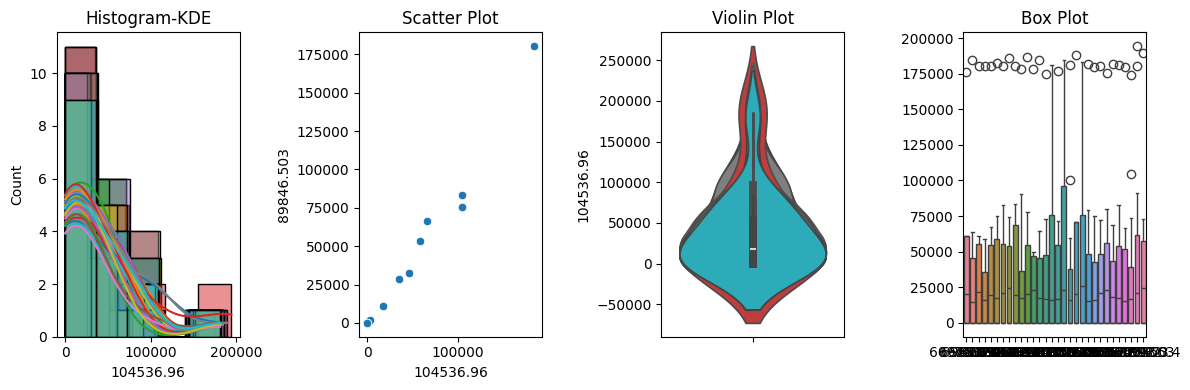

Sheet: Sheet2


KeyboardInterrupt: 

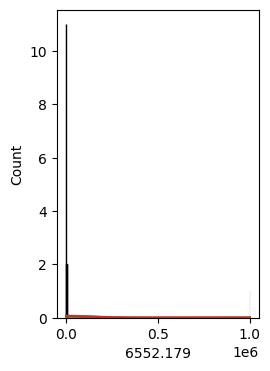

In [3]:
#Third cell
for root, dirs, files in os.walk(temp_dir):
    for file in files:
        if "_full.xlsx" in file:
            file_path = os.path.join(root, file)
            print(f"Processing file: {file_path}")

            excel_data = pd.ExcelFile(file_path)
            for sheet_name in excel_data.sheet_names:
                if sheet_name.startswith("Sheet"):
                    print(f"Sheet: {sheet_name}")
                    df = excel_data.parse(sheet_name)

                    plt.figure(figsize=(12, 4))

                    plt.subplot(1, 4, 1)
                    for column in df.select_dtypes(include=["number"]).columns:
                        sns.histplot(df[column], kde=True)
                    plt.title("Histogram-KDE")

                    plt.subplot(1, 4, 2)
                    if len(df.columns) >= 2:
                        sns.scatterplot(x=df.columns[0], y=df.columns[1], data=df)
                    plt.title("Scatter Plot")

                    plt.subplot(1, 4, 3)
                    for column in df.select_dtypes(include=["number"]).columns:
                        sns.violinplot(y=df[column])
                    plt.title("Violin Plot")

                    plt.subplot(1, 4, 4)
                    sns.boxplot(data=df.select_dtypes(include=["number"]))
                    plt.title("Box Plot")

                    plt.tight_layout()
                    plt.show()

**Shapiro, Mean Error, and Std Dev**

In [4]:
#Forth cell
mean_errors = {}
std_devs = {}
shapiro_p_values = {}

temp_dir = "temp_extracted"

for root, dirs, files in os.walk(temp_dir):
    for file in files:
        if file.endswith("_actual.xlsx") or file.endswith("_full.xlsx"):
            file_path = os.path.join(root, file)

            if "_actual.xlsx" in file:
                full_file = file.replace("_actual.xlsx", "_full.xlsx")

                if full_file in files:
                    print(f"Processing: {file} and {full_file}")

                    actual_data = pd.ExcelFile(file_path)
                    full_data = pd.ExcelFile(os.path.join(root, full_file))

                    for sheet_name in actual_data.sheet_names:
                        if sheet_name in full_data.sheet_names:
                            df_actual = actual_data.parse(sheet_name, header=None)
                            df_full = full_data.parse(sheet_name, header=None)

                            numeric_columns = df_actual.select_dtypes(include="number").columns
                            if not numeric_columns.empty:
                                mean_errors[sheet_name] = {}
                                std_devs[sheet_name] = {}
                                shapiro_p_values[sheet_name] = {}

                                for col in numeric_columns:
                                    actual_col_data = df_actual.iloc[:, col]
                                    full_col_data = df_full.iloc[:, col]

                                    mean_error = (full_col_data - actual_col_data).mean()
                                    std_dev = full_col_data.std()
                                    shapiro_stat, shapiro_p = stats.shapiro(actual_col_data)

                                    mean_errors[sheet_name][col] = mean_error
                                    std_devs[sheet_name][col] = std_dev
                                    shapiro_p_values[sheet_name][col] = shapiro_p

                                    print(f"Sheet: {sheet_name}, Column: {col}")
                                    print(f"  Mean Error: {mean_error}")
                                    print(f"  Standard Deviation: {std_dev}")
                                    print(f"  Shapiro Test p-value: {shapiro_p}")

print("Mean Errors: ", mean_errors)
print("Standard Deviations: ", std_devs)
print("Shapiro Test p-values: ", shapiro_p_values)

mean_errors_df = pd.DataFrame(mean_errors)
std_devs_df = pd.DataFrame(std_devs)
shapiro_p_values_df = pd.DataFrame(shapiro_p_values)

with pd.ExcelWriter("10D_results.xlsx") as writer:
    mean_errors_df.to_excel(writer, sheet_name='Mean Errors')
    std_devs_df.to_excel(writer, sheet_name='Standard Deviations')
    shapiro_p_values_df.to_excel(writer, sheet_name='Shapiro P-Values')

with pd.ExcelWriter("20D_results.xlsx") as writer:
    mean_errors_df.to_excel(writer, sheet_name='Mean Errors')
    std_devs_df.to_excel(writer, sheet_name='Standard Deviations')
    shapiro_p_values_df.to_excel(writer, sheet_name='Shapiro P-Values')

Streaming output truncated to the last 5000 lines.
  Standard Deviation: 242486.5721773596
  Shapiro Test p-value: 2.1866685840122418e-08
Sheet: Sheet7, Column: 12
  Mean Error: 0.0
  Standard Deviation: 242486.21886420503
  Shapiro Test p-value: 2.18610376419208e-08
Sheet: Sheet7, Column: 13
  Mean Error: 0.0
  Standard Deviation: 242487.55808543056
  Shapiro Test p-value: 2.1868319651107176e-08
Sheet: Sheet7, Column: 14
  Mean Error: 0.0
  Standard Deviation: 242485.96046968646
  Shapiro Test p-value: 2.186218193882466e-08
Sheet: Sheet7, Column: 15
  Mean Error: 0.0
  Standard Deviation: 242485.7107230218
  Shapiro Test p-value: 2.186669732386057e-08
Sheet: Sheet7, Column: 16
  Mean Error: 0.0
  Standard Deviation: 242485.78150376456
  Shapiro Test p-value: 2.1865483640876393e-08
Sheet: Sheet7, Column: 17
  Mean Error: 0.0
  Standard Deviation: 242486.34704520484
  Shapiro Test p-value: 2.1866516909641104e-08
Sheet: Sheet7, Column: 18
  Mean Error: 0.0
  Standard Deviation: 242487.58

**Ttest**

In [5]:
#Fifth cell
ttest_results = {}

for root, dirs, files in os.walk(temp_dir):
    for file in files:
        if file.endswith("_actual.xlsx"):
            full_file = file.replace("_actual.xlsx", "_full.xlsx")
            if full_file in files:
                actual_data = pd.ExcelFile(os.path.join(root, file))
                full_data = pd.ExcelFile(os.path.join(root, full_file))
                for sheet_name in actual_data.sheet_names:
                    if sheet_name in full_data.sheet_names:
                        df_actual = actual_data.parse(sheet_name)
                        df_full = full_data.parse(sheet_name)

                        numeric_columns = df_actual.select_dtypes(include="number").columns
                        ttest_results[sheet_name] = {}

                        for col in numeric_columns:
                            actual_col_data = df_actual[col]
                            full_col_data = df_full[col]

                            t_stat, p_val = stats.ttest_ind(actual_col_data, full_col_data)
                            ttest_results[sheet_name][col] = (t_stat, p_val)

with pd.ExcelWriter("ttest_results.xlsx") as writer:
    pd.DataFrame(ttest_results).to_excel(writer, sheet_name='T-Test Results')

**Wilcoxon**

In [6]:
#Sixth cell
wilcoxon_results = {}

for root, dirs, files in os.walk(temp_dir):
    for file in files:
        if file.endswith("_actual.xlsx"):
            full_file = file.replace("_actual.xlsx", "_full.xlsx")
            if full_file in files:
                actual_data = pd.ExcelFile(os.path.join(root, file))
                full_data = pd.ExcelFile(os.path.join(root, full_file))
                for sheet_name in actual_data.sheet_names:
                    if sheet_name in full_data.sheet_names:
                        df_actual = actual_data.parse(sheet_name)
                        df_full = full_data.parse(sheet_name)

                        numeric_columns = df_actual.select_dtypes(include="number").columns
                        wilcoxon_results[sheet_name] = {}

                        for col in numeric_columns:
                            actual_col_data = df_actual[col]
                            full_col_data = df_full[col]

                            stat, p_val = wilcoxon(actual_col_data, full_col_data)
                            wilcoxon_results[sheet_name][col] = (stat, p_val)

with pd.ExcelWriter("wilcoxon_results.xlsx") as writer:
    pd.DataFrame(wilcoxon_results).to_excel(writer, sheet_name='Wilcoxon Results')

ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.

**Friedman**

In [9]:
#Seventh cell
friedman_results = {}

reference_sheet = None
max_p_value = -1

for sheet_name, results in wilcoxon_results.items():
    p_values = [p for _, p in results.values()]
    average_p_value = sum(p_values) / len(p_values)
    if average_p_value > max_p_value:
        max_p_value = average_p_value
        reference_sheet = sheet_name

print(f"Selected reference sheet: {reference_sheet}")

for root, dirs, files in os.walk(temp_dir):
    for file in files:
        if file.endswith("_actual.xlsx"):
            full_file = file.replace("_actual.xlsx", "_full.xlsx")
            if full_file in files:
                actual_data = pd.ExcelFile(os.path.join(root, file))

                friedman_values = []
                for sheet_name in actual_data.sheet_names:
                    df_actual = actual_data.parse(sheet_name)
                    friedman_values.append(df_actual.values.flatten())

                if len(friedman_values) > 1:
                    stat, p_val = friedmanchisquare(*friedman_values)
                    friedman_results[file] = {"statistic": stat, "p_value": p_val}
                else:
                    print(f"Not enough data for Friedman test in {file}. Skipping.")

friedman_df = pd.DataFrame.from_dict(friedman_results, orient='index')
with pd.ExcelWriter("friedman_results.xlsx") as writer:
    friedman_df.to_excel(writer, sheet_name='Friedman Results')

ZeroDivisionError: division by zero

**PostHocs & Adjusted P-Values**

In [11]:
#Eighth cell
adjusted_results = {}
methods = ['bonferroni', 'holm', 'holland', 'hochberg', 'hommel']

for test_results, test_name in zip([shapiro_p_values, ttest_results, wilcoxon_results], ['shapiro', 'ttest', 'wilcoxon']):
    for sheet_name, results in test_results.items():
        p_values = [p for _, p in results.values()]
        method_adjustments = {}
        for method in methods:
            corrections = multipletests(p_values, method=method)
            method_adjustments[method] = corrections[1]

        if sheet_name not in adjusted_results:
            adjusted_results[sheet_name] = {}

        adjusted_results[sheet_name][f'{test_name}_adjusted'] = method_adjustments

with pd.ExcelWriter("adjusted_results.xlsx") as writer:
    for sheet_name, method_adjustments in adjusted_results.items():
        df = pd.DataFrame(method_adjustments)
        df.columns = [f'{method}_adjusted' for method in methods]
        df.to_excel(writer, sheet_name=sheet_name)

TypeError: cannot unpack non-iterable numpy.float64 object